In [56]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
n_in = 300 #历史数量
n_out = 100 #预测数量
n_features = 1
# n_test = 1
n_val = 1
n_epochs = 100

In [72]:
#d导入数据
def load_stw_data() -> pd.DataFrame:
    
    #df_stw = pd.read_excel('data3.xlsx')
    #df_stw.columns = ['Date', 'patients']
    df_stw = pd.read_csv('all.csv')
    df_stw.drop(labels=['BUDAPEST','BARANYA','BACS','BORSOD','CSONGRAD',
                        'FEJER','GYOR','HAJDU','HEVES','JASZ',
                        'KOMAROM','NOGRAD','PEST','SOMOGY','SZABOLCS',
                        'TOLNA','VAS','VESZPREM','ZALA'],axis=1,inplace=True)
    df_stw['Date']=df_stw['Date'].astype(object)
    df_stw['Date']=pd.to_datetime(df_stw['Date'])
    tmp=df_stw.set_index('Date')
    return df_stw

In [73]:
#MinMaxScaler数据归一化，可以帮助网络模型更快的拟合，稍微有一些提高准确率的效果
def minmaxscaler(data: pd.DataFrame) -> pd.DataFrame:
    
    volume = data.BEKES.values
    volume = volume.reshape(len(volume), 1)
    volume = scaler.fit_transform(volume)
    volume = volume.reshape(len(volume),)    
    data['BEKES'] = volume
        
    return data

In [74]:
#划分训练数据集和验证数据集
def split_data(x, y, n_test: int):
    
    x_train = x[:-n_val-n_out+1]
    x_val = x[-n_val:]
    y_train = y[:-n_val-n_out+1]
    y_val = y[-n_val:] 
    
    return x_train, y_train, x_val, y_val

In [75]:
#划分X和Y
def build_train(train, n_in, n_out):
    
    train = train.drop(["Date"], axis=1)
    X_train, Y_train = [], []
    for i in range(train.shape[0]-n_in-n_out+1):
        X_train.append(np.array(train.iloc[i:i+n_in]))
        Y_train.append(np.array(train.iloc[i+n_in:i+n_in+n_out]["BEKES"]))
        
    return np.array(X_train), np.array(Y_train)

In [76]:
#构建最简单的LSTM
def build_lstm(n_in: int, n_features: int):
    
    model = Sequential()
    model.add(LSTM(256, activation='relu', input_shape=(n_in, n_features)))
    model.add(Dropout(0.2))
   
    model.add(Dense(n_out))
    model.compile(optimizer='adam', loss='mae')
    
    return model

In [77]:
#模型拟合
def model_fit(x_train, y_train, x_val, y_val, n_features):
    
    model = build_lstm(
        n_in   = n_in,
        n_features= 1
    )
    model.compile(loss='mae', optimizer='adam')
    model.fit(x_train, y_train, epochs=n_epochs, batch_size=32, verbose=1,  validation_data=(x_val, y_val))
    m = model.evaluate(x_val, y_val)
    print(m)
    
    return model

In [78]:
#读入数据
data = load_stw_data()
data.head()
scaler = MinMaxScaler(feature_range=(0, 1))
data = minmaxscaler(data)

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [79]:
data_copy = data.copy()
x, y = build_train(data_copy, n_in, n_out)
x_train, y_train, x_val, y_val = split_data(x, y, n_val)
model = build_lstm(n_in, 1)
model = model_fit(x_train, y_train, x_val, y_val, 1)
predict = model.predict(x_val)  

Epoch 1/100
1/1 [==============================] - 0s 199ms/step - loss: 0.0733 - val_loss: 0.0554
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 0.0709 - val_loss: 0.0537
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 0.0693 - val_loss: 0.0522
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 0.0675 - val_loss: 0.0507
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0657 - val_loss: 0.0492
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0643 - val_loss: 0.0478
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 0.0631 - val_loss: 0.0467
Epoch 8/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0614 - val_loss: 0.0464
Epoch 9/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0601 - val_loss: 0.0470
Epoch 10/100
1/1 [==============================] - 0s 41ms/step - loss: 0.0587 - val_loss: 0.0483
Epoch 11/100
1/1 [

Epoch 84/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0326 - val_loss: 0.0535
Epoch 85/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0326 - val_loss: 0.0529
Epoch 86/100
1/1 [==============================] - 0s 62ms/step - loss: 0.0326 - val_loss: 0.0525
Epoch 87/100
1/1 [==============================] - 0s 62ms/step - loss: 0.0326 - val_loss: 0.0522
Epoch 88/100
1/1 [==============================] - 0s 73ms/step - loss: 0.0329 - val_loss: 0.0523
Epoch 89/100
1/1 [==============================] - 0s 62ms/step - loss: 0.0323 - val_loss: 0.0524
Epoch 90/100
1/1 [==============================] - 0s 82ms/step - loss: 0.0328 - val_loss: 0.0526
Epoch 91/100
1/1 [==============================] - 0s 68ms/step - loss: 0.0326 - val_loss: 0.0525
Epoch 92/100
1/1 [==============================] - 0s 64ms/step - loss: 0.0322 - val_loss: 0.0527
Epoch 93/100
1/1 [==============================] - 0s 54ms/step - loss: 0.0325 - val_loss: 0.0529
Epoch 94/1

In [80]:

# predict = model.predict(x_val)  
validation = scaler.inverse_transform(predict)[0]
validation

array([ 3.84009972e+01,  3.96059875e+01,  3.91627464e+01,  4.11119423e+01,
        3.97048874e+01,  4.06983070e+01,  4.01984482e+01,  4.14480362e+01,
        3.95195923e+01,  3.94257660e+01,  3.91003990e+01,  3.97140656e+01,
        3.76116753e+01,  3.87414780e+01,  3.86002617e+01,  3.73083420e+01,
        3.42472687e+01,  3.44039726e+01,  3.11521473e+01,  2.67636814e+01,
        2.36215019e+01,  1.99408512e+01,  1.76369247e+01,  1.78663864e+01,
        1.46044836e+01,  1.51006422e+01,  1.05900040e+01,  1.09684229e+01,
        1.10533400e+01,  9.01378536e+00,  7.87562084e+00,  6.98684263e+00,
        4.76421070e+00,  2.95992875e+00,  1.98551428e+00,  2.13698101e+00,
       -4.12930176e-02,  9.98536646e-01,  1.49398041e+00,  2.29625869e+00,
        2.42340326e+00,  3.91252279e+00,  3.98475099e+00,  3.62579536e+00,
        4.40503263e+00,  6.14033175e+00,  5.74993515e+00,  7.01873255e+00,
        7.33386612e+00,  8.36503792e+00,  7.07468462e+00,  7.60028696e+00,
        8.00353336e+00,  

In [81]:
actual = scaler.inverse_transform(y_val)[0]
actual

array([23., 55., 32., 39., 27., 15., 65., 50.,  8., 13., 14., 30., 43.,
        8.,  4.,  5.,  8.,  6., 28.,  7., 12., 70., 14.,  1.,  8.,  5.,
        3.,  2.,  0.,  3.,  0.,  1.,  1.,  1.,  8.,  0.,  1.,  7., 11.,
        4., 11.,  8., 19., 10., 11., 23.,  0.,  1.,  4.,  4., 13., 24.,
       14., 26., 21., 30., 41., 20., 50., 58., 54., 26., 56.,  6.,  0.,
       59., 62.,  9., 74., 27.,  8., 11.,  8.,  4.,  5.,  3.,  2.,  7.,
        0.,  4.,  1.,  7.,  0.,  0.,  1.,  1.,  0.,  1.,  1., 26.,  2.,
        0.,  0.,  7.,  2.,  6., 10.,  0.,  0., 32.])

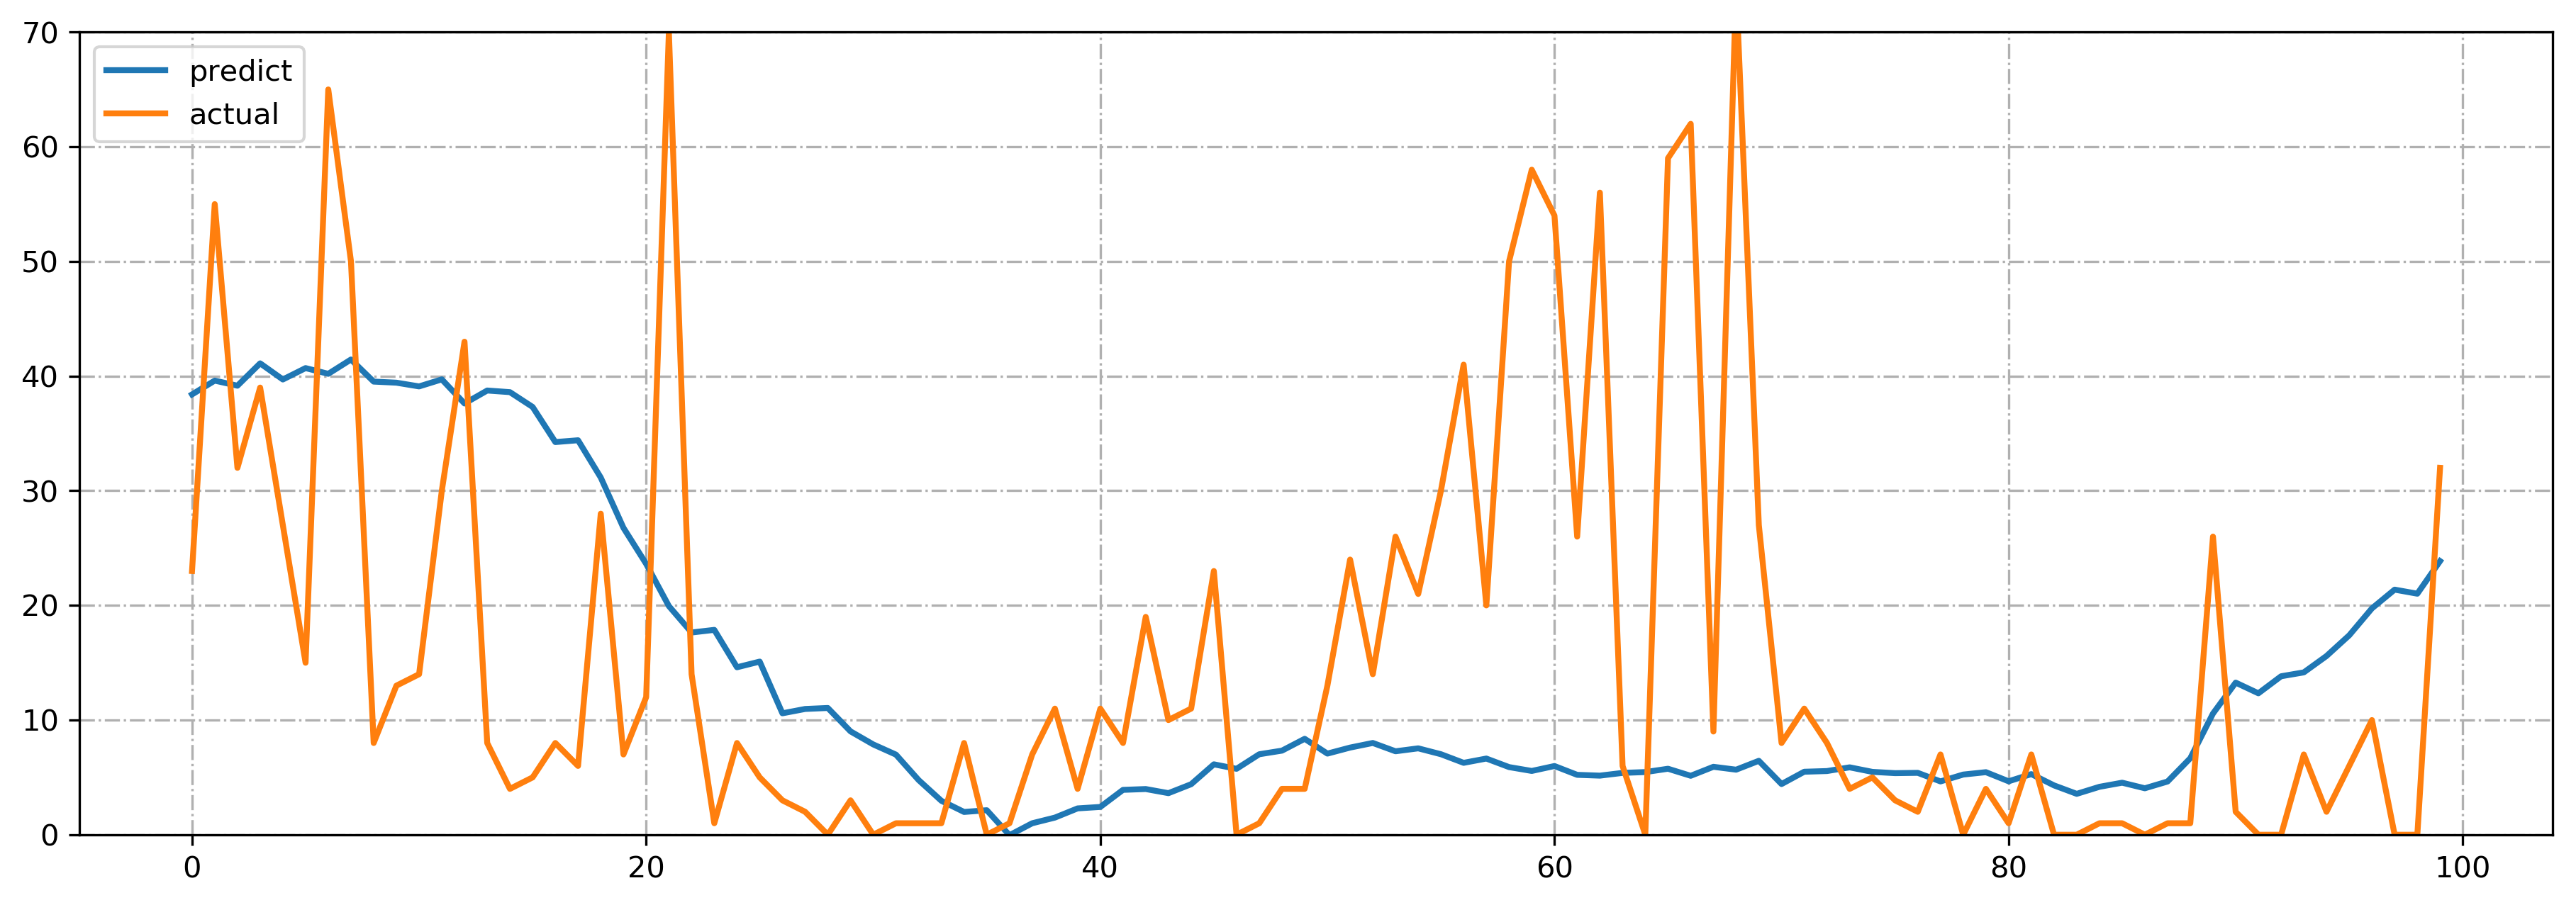

In [82]:
predict = validation
actual = actual
x = [x for x in range(100)]
fig, ax = plt.subplots(figsize=(15,5),dpi = 300)
ax.plot(x, predict, linewidth=2.0,label = "predict")
ax.plot(x, actual, linewidth=2.0,label = "actual")
ax.legend(loc=2);
plt.ylim((0, 70))
plt.grid(linestyle='-.')
plt.show()

In [83]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(actual, predict))

MAE: 14.03852553538978


In [84]:
from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(actual, predict))

MSE: 403.8944210083799
